# Covid19 Data Analysis

### Data Preparation 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sb
import matplotlib.pyplot as plt 
import datetime

In [2]:
cases = pd.read_csv('C:/Users/Carla/Desktop/Projects/Covid/Covid_Cases_Pt1.csv') 
cases.head()

,Key,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
0,AFG-43885,AFG,Asia,Afghanistan,24/02/2020,5,5,0.0,0,0,...,0.0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
1,AFG-43886,AFG,Asia,Afghanistan,25/02/2020,5,0,0.0,0,0,...,0.0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
2,AFG-43887,AFG,Asia,Afghanistan,26/02/2020,5,0,0.0,0,0,...,0.0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
3,AFG-43888,AFG,Asia,Afghanistan,27/02/2020,5,0,0.0,0,0,...,0.0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
4,AFG-43889,AFG,Asia,Afghanistan,28/02/2020,5,0,0.0,0,0,...,0.0,0.0,0,0.0,0,0.0,0,0.0,0,0.0


In [3]:
testvac = pd.read_csv('C:/Users/Carla/Desktop/Projects/Covid/Covid_Cases_Pt2.csv') 
testvac.head()

,Key,iso_code,continent,location,date,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred
0,AFG-43885,AFG,Asia,Afghanistan,24/02/2020,0,0,0.0,0.0,0,0.0,0.0,0,0,0,0.0,0.0,0.0
1,AFG-43886,AFG,Asia,Afghanistan,25/02/2020,0,0,0.0,0.0,0,0.0,0.0,0,0,0,0.0,0.0,0.0
2,AFG-43887,AFG,Asia,Afghanistan,26/02/2020,0,0,0.0,0.0,0,0.0,0.0,0,0,0,0.0,0.0,0.0
3,AFG-43888,AFG,Asia,Afghanistan,27/02/2020,0,0,0.0,0.0,0,0.0,0.0,0,0,0,0.0,0.0,0.0
4,AFG-43889,AFG,Asia,Afghanistan,28/02/2020,0,0,0.0,0.0,0,0.0,0.0,0,0,0,0.0,0.0,0.0


### Exploration of Cases

In [4]:
cases.shape

(152695, 26)

In [5]:
cases.dtypes

Key                                    object
iso_code                               object
continent                              object
location                               object
date                                   object
total_cases                             int64
new_cases                               int64
new_cases_smoothed                    float64
total_deaths                            int64
new_deaths                              int64
new_deaths_smoothed                   float64
total_cases_per_million               float64
new_cases_per_million                 float64
new_cases_smoothed_per_million        float64
total_deaths_per_million              float64
new_deaths_per_million                float64
new_deaths_smoothed_per_million       float64
reproduction_rate                     float64
icu_patients                            int64
icu_patients_per_million              float64
hosp_patients                           int64
hosp_patients_per_million         

In [6]:
# Changing the type of date from object to datetime
cases['date'] = pd.to_datetime(cases['date'],format='%d/%m/%Y')

In [7]:
#Evaluation of columns
cases.columns

Index(['Key', 'iso_code', 'continent', 'location', 'date', 'total_cases',
       'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million'],
      dtype='object')

In [8]:
#Overview of worldwide new cases and deaths overtime 
casests = cases.drop(['Key', 'iso_code', 'continent', 'location', 'total_cases', 'new_cases_smoothed', 
        'total_deaths','new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million'],axis=1)
casests.head()
#casests.tail()

,date,new_cases,new_deaths
0,2020-02-24,5,0
1,2020-02-25,0,0
2,2020-02-26,0,0
3,2020-02-27,0,0
4,2020-02-28,0,0


In [9]:
# Creation of new data set grouped by month to see evolution over time
newcasets = casests.groupby(casests['date'].dt.strftime('%B-%Y'))['new_cases'].sum()  # Grouping all values by month
newdeathts = casests.groupby(casests['date'].dt.strftime('%B-%Y'))['new_deaths'].sum()
totalts = pd.concat([newcasets, newdeathts], axis=1) # Join both df into one containing new cases and new deaths across time
totalts.reset_index(level=0, inplace=True) # Removing the date as index
totalts['date']= pd.to_datetime(totalts['date']) # Making dates into correct format 
totalts.sort_values(by='date', inplace=True) # Order data by date to see evelution of decease across time
totalts   

,date,new_cases,new_deaths
8,2020-01-01,37493,784
6,2020-02-01,304362,10939
15,2020-03-01,3556097,194924
0,2020-04-01,10210098,861682
17,2020-05-01,11803153,621952
13,2020-06-01,17233074,587546
11,2020-07-01,28745147,707174
2,2020-08-01,32083201,737577
23,2020-09-01,35014185,667189
21,2020-10-01,51995294,764487


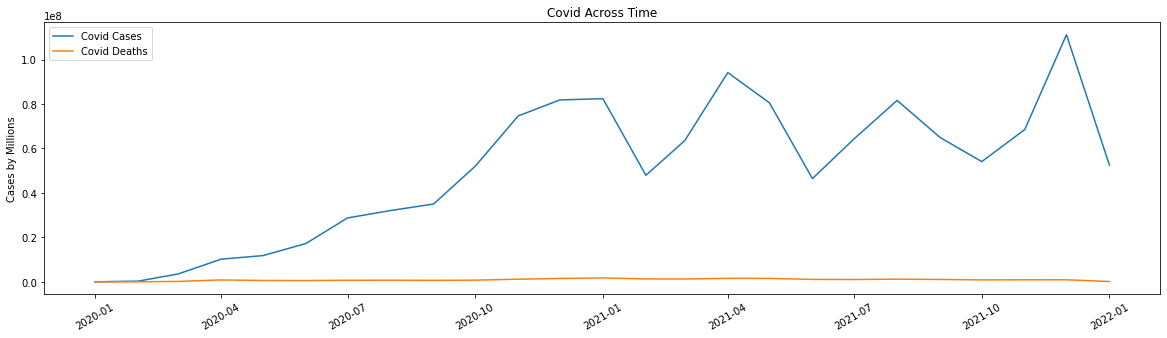

In [10]:
#Graphical representation of Timeseries
x = totalts['date']
y = totalts['new_cases']
z = totalts['new_deaths']

plt.figure(figsize=(20,5))
plt.plot(x, y)
plt.plot(x, z)

#plt.xlabel("")
plt.ylabel("Cases by Millions")
plt.title("Covid Across Time")
plt.xticks(rotation=30)
plt.legend(['Covid Cases', 'Covid Deaths'])

plt.show()

In [11]:
# Overview by Continent
cont = cases.drop(['Key', 'iso_code', 'date', 'total_cases',
       'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'hosp_patients', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million'],axis=1)
cont.head()
#cont.tail()

,continent,location,new_cases_per_million,new_deaths_per_million,icu_patients_per_million,hosp_patients_per_million
0,Asia,Afghanistan,0.126,0.0,0.0,0.0
1,Asia,Afghanistan,0.000,0.0,0.0,0.0
2,Asia,Afghanistan,0.000,0.0,0.0,0.0
3,Asia,Afghanistan,0.000,0.0,0.0,0.0
4,Asia,Afghanistan,0.000,0.0,0.0,0.0


In [12]:
# Droping rows of data where continent is not assigned
cont.drop( cont[ cont['continent'] == "0" ].index , inplace=True)

In [13]:
contgroup = cont.groupby('continent').sum()
contgroup

,new_cases_per_million,new_deaths_per_million,icu_patients_per_million,hosp_patients_per_million
continent,,,,
Africa,1011397.385,14539.485,319.958,0.000
Asia,2444171.195,26093.254,17131.454,130119.386
Europe,7542562.577,96499.375,371804.974,3083475.191
North America,2752216.987,34450.707,31906.049,122441.773
Oceania,349818.921,4804.668,1406.731,8190.690
South America,965178.691,26621.863,38414.346,0.000


<AxesSubplot:xlabel='continent'>

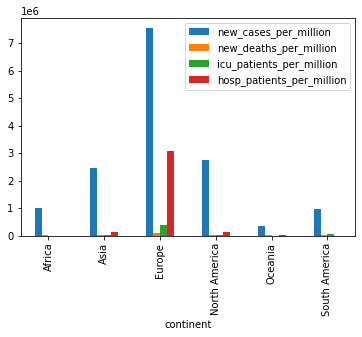

In [14]:
#Graphical representation of continent data
contgroup.plot(kind="bar")

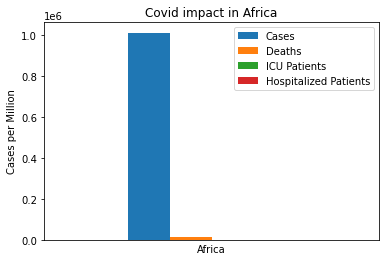

In [15]:
# Africa
contgroupidx = contgroup.reset_index(level=0, inplace=False) # Removing the date as index
contgroupidx[ contgroupidx['continent'] == "Africa" ].plot(kind="bar")
plt.title("Covid impact in Africa")
plt.xlabel("Africa")
plt.xticks([]) # Remove the x values - not needed for this representation
plt.ylabel("Cases per Million")
plt.legend(["Cases", "Deaths","ICU Patients", "Hospitalized Patients"])

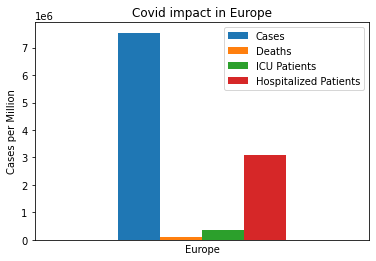

In [16]:
# Europe
contgroupidx = contgroup.reset_index(level=0, inplace=False) # Removing the date as index
contgroupidx[ contgroupidx['continent'] == "Europe" ].plot(kind="bar")
plt.title("Covid impact in Europe")
plt.xlabel("Europe")
plt.xticks([]) # Remove the x values - not needed for this representation
plt.ylabel("Cases per Million")
plt.legend(["Cases", "Deaths","ICU Patients", "Hospitalized Patients"])

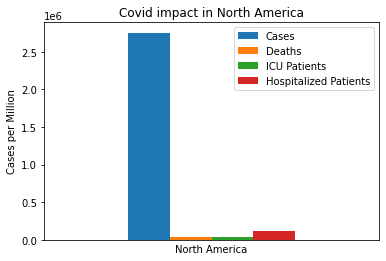

In [17]:
# North America
contgroupidx = contgroup.reset_index(level=0, inplace=False) # Removing the date as index
contgroupidx[ contgroupidx['continent'] == "North America" ].plot(kind="bar")
plt.title("Covid impact in North America")
plt.xlabel("North America")
plt.xticks([]) # Remove the x values - not needed for this representation
plt.ylabel("Cases per Million")
plt.legend(["Cases", "Deaths","ICU Patients", "Hospitalized Patients"])

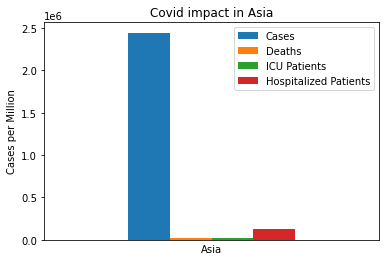

In [18]:
# Asia
contgroupidx = contgroup.reset_index(level=0, inplace=False) # Removing the date as index
contgroupidx[ contgroupidx['continent'] == "Asia" ].plot(kind="bar")
plt.title("Covid impact in Asia")
plt.xlabel("Asia")
plt.xticks([]) # Remove the x values - not needed for this representation
plt.ylabel("Cases per Million")
plt.legend(["Cases", "Deaths","ICU Patients", "Hospitalized Patients"])

In [19]:
# Grouping including Countries
contgroup2 = cont.groupby(['location']).sum()
contgroup2

,new_cases_per_million,new_deaths_per_million,icu_patients_per_million,hosp_patients_per_million
location,,,,
Afghanistan,3973.229,184.910,0.000,0.0
Albania,74229.695,1123.530,0.000,0.0
Algeria,4949.380,141.589,319.958,0.0
Andorra,326925.564,1822.817,0.000,0.0
Angola,2582.240,52.944,0.000,0.0
...,...,...,...,...
Vietnam,18779.499,342.699,0.000,0.0
Wallis and Futuna,40923.026,630.973,0.000,0.0
Yemen,332.980,65.163,0.000,0.0


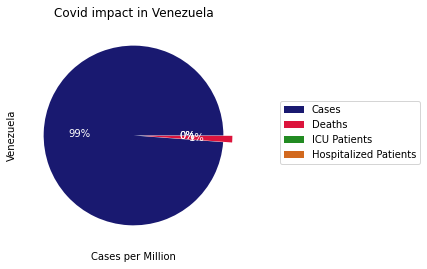

In [39]:
# Venezuela
contgroup2.loc['Venezuela'].plot.pie(labels=['','','',''],
                                    colors=['midnightblue', 'crimson', 'forestgreen', 'chocolate'],
                                    explode=(0, 0.1, 0, 0), autopct='%.0f%%', textprops = dict(color ="white"))

plt.title("Covid impact in Venezuela")
plt.xticks([])
plt.yticks([])# Remove the x values - not needed for this representation
plt.xlabel("Cases per Million")
plt.legend(bbox_to_anchor=(1,0.5), loc="center right", labels=["Cases", "Deaths","ICU Patients", "Hospitalized Patients"],
          bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.65)

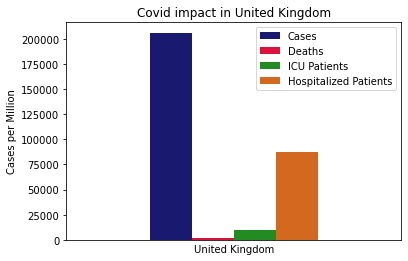

In [21]:
# United Kingdom
contgroupidx2 = contgroup2.reset_index(level=0, inplace=False) # Removing the date as index
contgroupidx2[ contgroupidx2['location'] == "United Kingdom" ].plot(kind="bar",
                                                               color=['midnightblue', 'crimson', 'forestgreen', 'chocolate'])
plt.title("Covid impact in United Kingdom")
plt.xlabel("United Kingdom")
plt.xticks([]) # Remove the x values - not needed for this representation
plt.ylabel("Cases per Million")
plt.legend(["Cases", "Deaths","ICU Patients", "Hospitalized Patients"])

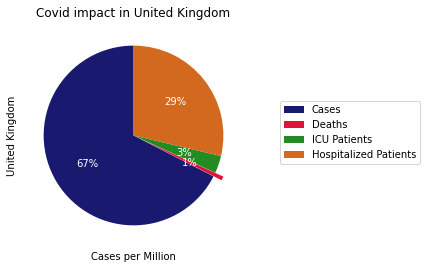

In [40]:
# United Kingdom
contgroup2.loc['United Kingdom'].plot.pie(labels=['','','',''],
                                          colors=['midnightblue', 'crimson', 'forestgreen', 'chocolate'],
                                          explode=(0, 0.1, 0, 0), autopct='%.0f%%', textprops = dict(color ="white"), 
                                          startangle=90)

plt.title("Covid impact in United Kingdom")
plt.xticks([])
plt.yticks([])# Remove the x values - not needed for this representation
plt.xlabel("Cases per Million")
plt.legend(bbox_to_anchor=(1,0.5), loc="center right", labels=["Cases", "Deaths","ICU Patients", "Hospitalized Patients"],
          bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.65)

### Exploration of Covid tests and vaccines

In [23]:
testvac.shape

(152695, 18)

In [24]:
testvac.dtypes

Key                                     object
iso_code                                object
continent                               object
location                                object
date                                    object
new_tests                                int64
total_tests                              int64
total_tests_per_thousand               float64
new_tests_per_thousand                 float64
new_tests_smoothed                       int64
new_tests_smoothed_per_thousand        float64
positive_rate                          float64
total_vaccinations                       int64
people_vaccinated                        int64
people_fully_vaccinated                  int64
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
dtype: object

In [25]:
testvac['date'] = pd.to_datetime(testvac['date'],format='%d/%m/%Y')
testvac.dtypes

Key                                            object
iso_code                                       object
continent                                      object
location                                       object
date                                   datetime64[ns]
new_tests                                       int64
total_tests                                     int64
total_tests_per_thousand                      float64
new_tests_per_thousand                        float64
new_tests_smoothed                              int64
new_tests_smoothed_per_thousand               float64
positive_rate                                 float64
total_vaccinations                              int64
people_vaccinated                               int64
people_fully_vaccinated                         int64
total_vaccinations_per_hundred                float64
people_vaccinated_per_hundred                 float64
people_fully_vaccinated_per_hundred           float64
dtype: object

In [26]:
testvac.columns

Index(['Key', 'iso_code', 'continent', 'location', 'date', 'new_tests',
       'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'total_vaccinations', 'people_vaccinated',
       'people_fully_vaccinated', 'total_vaccinations_per_hundred',
       'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred'],
      dtype='object')

In [27]:
testvacclean = testvac.drop(['Key', 'iso_code', 'date', 'new_tests',
                           'total_tests_per_thousand', 'new_tests_per_thousand',
                           'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
                           'positive_rate', 'people_vaccinated',
                           'people_fully_vaccinated', 'total_vaccinations_per_hundred',
                           'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred'],
                           axis=1)
testvacclean.head()

,continent,location,total_tests,total_vaccinations
0,Asia,Afghanistan,0,0
1,Asia,Afghanistan,0,0
2,Asia,Afghanistan,0,0
3,Asia,Afghanistan,0,0
4,Asia,Afghanistan,0,0


In [28]:
# Droping rows of data where continent is not assigned
testvacclean.drop( testvacclean[ testvacclean['continent'] == "0" ].index , inplace=True)

In [29]:
testvacclean = testvacclean.groupby(['continent','location']).max()
testvacclean

total_tests  total_vaccinations
continent     location                                     
Africa        Algeria                 0            12545356
              Angola                  0            11797041
              Benin              640586             1897214
              Botswana          1944469             2206312
              Burkina Faso            0             1192663
...                                 ...                 ...
South America Paraguay          2050946             6833614
              Peru              6808992            50345263
              Suriname                0              491853
              Uruguay           4428210             6992609
              Venezuela               0            30049714

[225 rows x 2 columns]

In [30]:
testvaccont = testvacclean.groupby('continent').sum()
testvaccont

,total_tests,total_vaccinations
continent,,
Africa,68686274,320376426
Asia,1591083365,6383574194
Europe,1694905543,1119225409
North America,802687272,837181147
Oceania,61832897,55305632
South America,169556345,655663583


Text(0, 0.5, 'Continent')

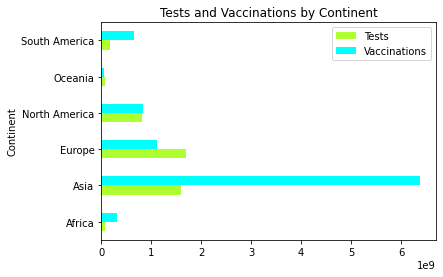

In [31]:
#Graphical representation by continent of tests made and vaccination of people
testvaccont.plot(kind='barh', color=('greenyellow','cyan'))
plt.title("Tests and Vaccinations by Continent")
plt.legend(labels=["Tests", "Vaccinations"])
plt.ylabel("Continent")

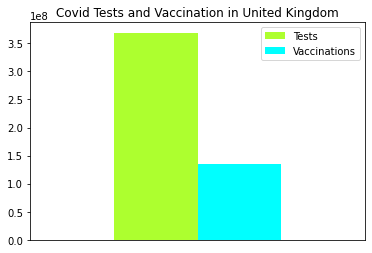

In [32]:
#Overview by Country
testvaccountry = testvacclean.groupby('location').sum()
testvaccountry

# United Kingdom
testvaccountry2 = testvaccountry.reset_index(level=0, inplace=False) # Removing the date as index
testvaccountry2[ testvaccountry2['location'] == "United Kingdom" ].plot(kind="bar",
                                                               color=['greenyellow','cyan'])
plt.title("Covid Tests and Vaccination in United Kingdom")
plt.xticks([]) # Remove the x values - not needed for this representation
plt.legend(labels=["Tests", "Vaccinations"])

### All sets together

In [33]:
#Joining of 2 data sets for the continent information
continentj = contgroup.join(testvaccont,how='left') 
continentj

,new_cases_per_million,new_deaths_per_million,icu_patients_per_million,hosp_patients_per_million,total_tests,total_vaccinations
continent,,,,,,
Africa,1011397.385,14539.485,319.958,0.000,68686274,320376426
Asia,2444171.195,26093.254,17131.454,130119.386,1591083365,6383574194
Europe,7542562.577,96499.375,371804.974,3083475.191,1694905543,1119225409
North America,2752216.987,34450.707,31906.049,122441.773,802687272,837181147
Oceania,349818.921,4804.668,1406.731,8190.690,61832897,55305632
South America,965178.691,26621.863,38414.346,0.000,169556345,655663583


In [48]:
#Correlation of data points
corr = continentj.corr()
corr

,new_cases_per_million,new_deaths_per_million,icu_patients_per_million,hosp_patients_per_million,total_tests,total_vaccinations
new_cases_per_million,1.000000,0.980959,0.947986,0.951014,0.812715,0.120460
new_deaths_per_million,0.980959,1.000000,0.970518,0.956328,0.732537,0.022482
icu_patients_per_million,0.947986,0.970518,1.000000,0.994779,0.639596,-0.081951
hosp_patients_per_million,0.951014,0.956328,0.994779,1.000000,0.656817,-0.056598
total_tests,0.812715,0.732537,0.639596,0.656817,1.000000,0.662423
total_vaccinations,0.120460,0.022482,-0.081951,-0.056598,0.662423,1.000000


In [49]:
corr.style.background_gradient(cmap='PuOr_r')
# 'RdBu_r', 'BrBG_r', 'coolwarm'

,new_cases_per_million,new_deaths_per_million,icu_patients_per_million,hosp_patients_per_million,total_tests,total_vaccinations
new_cases_per_million,1.000000,0.980959,0.947986,0.951014,0.812715,0.120460
new_deaths_per_million,0.980959,1.000000,0.970518,0.956328,0.732537,0.022482
icu_patients_per_million,0.947986,0.970518,1.000000,0.994779,0.639596,-0.081951
hosp_patients_per_million,0.951014,0.956328,0.994779,1.000000,0.656817,-0.056598
total_tests,0.812715,0.732537,0.639596,0.656817,1.000000,0.662423
total_vaccinations,0.120460,0.022482,-0.081951,-0.056598,0.662423,1.000000


In [34]:
#Joining of 2 data sets for the country information
countriesj = contgroup2.join(testvaccountry,how='left') 
countriesj

,new_cases_per_million,new_deaths_per_million,icu_patients_per_million,hosp_patients_per_million,total_tests,total_vaccinations
location,,,,,,
Afghanistan,3973.229,184.910,0.000,0.0,0,4674518
Albania,74229.695,1123.530,0.000,0.0,737014,2367574
Algeria,4949.380,141.589,319.958,0.0,0,12545356
Andorra,326925.564,1822.817,0.000,0.0,266810,117246
Angola,2582.240,52.944,0.000,0.0,0,11797041
...,...,...,...,...,...,...
Vietnam,18779.499,342.699,0.000,0.0,35953000,156902083
Wallis and Futuna,40923.026,630.973,0.000,0.0,0,11939
Yemen,332.980,65.163,0.000,0.0,0,786027


In [50]:
#Correlation of data points
corr2 = countriesj.corr()
corr2

,new_cases_per_million,new_deaths_per_million,icu_patients_per_million,hosp_patients_per_million,total_tests,total_vaccinations
new_cases_per_million,1.000000,0.686739,0.432320,0.446582,0.148057,-0.055532
new_deaths_per_million,0.686739,1.000000,0.400920,0.473764,0.141299,-0.020386
icu_patients_per_million,0.432320,0.400920,1.000000,0.623354,0.293981,0.035676
hosp_patients_per_million,0.446582,0.473764,0.623354,1.000000,0.185635,-0.000339
total_tests,0.148057,0.141299,0.293981,0.185635,1.000000,0.515843
total_vaccinations,-0.055532,-0.020386,0.035676,-0.000339,0.515843,1.000000


In [51]:
corr2.style.background_gradient(cmap='PuOr_r')

,new_cases_per_million,new_deaths_per_million,icu_patients_per_million,hosp_patients_per_million,total_tests,total_vaccinations
new_cases_per_million,1.000000,0.686739,0.432320,0.446582,0.148057,-0.055532
new_deaths_per_million,0.686739,1.000000,0.400920,0.473764,0.141299,-0.020386
icu_patients_per_million,0.432320,0.400920,1.000000,0.623354,0.293981,0.035676
hosp_patients_per_million,0.446582,0.473764,0.623354,1.000000,0.185635,-0.000339
total_tests,0.148057,0.141299,0.293981,0.185635,1.000000,0.515843
total_vaccinations,-0.055532,-0.020386,0.035676,-0.000339,0.515843,1.000000


Text(0, 0.5, 'Covid deaths per million')

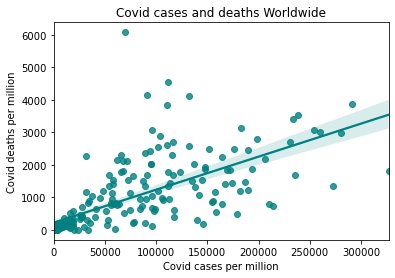

In [56]:
sb.regplot(data=countriesj, x='new_cases_per_million', y='new_deaths_per_million',color='teal')
plt.title("Covid cases and deaths Worldwide")
plt.xlabel("Covid cases per million")
plt.ylabel("Covid deaths per million")